<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/revision_evolutivo_categorico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten


from keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

from keras.utils import to_categorical

In [2]:

# Parámetros
num_dias = 100
num_periodos = 60
num_activos = 5
num_canales = 1

# Crear datos aleatorios para X
X = np.random.uniform(low=-1, high=1, size=(num_dias, num_periodos, num_activos, num_canales))

# Aplicar las transformaciones a los activos 1 y 2
X[:, :, 0, 0] *= 2  # Multiplicar los precios del canal 1 del activo 1 por 2
X[:, :, 1, 0] /= 2  # Dividir los precios del canal 1 del activo 2 entre 2

# Crear la etiqueta Y como el cumsum del canal 1
Y = np.sum(X[:, :, :, 0], axis=1)


In [3]:
X.shape, Y.shape

((100, 60, 5, 1), (100, 5))

# Funcion listas

In [4]:
def get_ranking(Y):
  Y_ranking = np.zeros_like(Y, dtype=int)

  for i in range(Y.shape[0]):
      Y_ranking[i] = np.argsort(np.argsort(-Y[i]))

  return Y_ranking

def get_ranking_tf(Y):
  Y_argsort = tf.argsort(Y, direction='DESCENDING')
  Y_ranking = tf.argsort(Y_argsort)
  return Y_ranking


In [5]:
Y = get_ranking(Y)

In [6]:
Y[0:4],get_ranking(Y[0:4])

(array([[0, 1, 3, 4, 2],
        [4, 1, 2, 0, 3],
        [4, 0, 3, 1, 2],
        [3, 1, 4, 0, 2]]),
 array([[4, 3, 1, 0, 2],
        [0, 3, 2, 4, 1],
        [0, 4, 1, 3, 2],
        [1, 3, 0, 4, 2]]))

In [7]:
Y[0:4]

array([[0, 1, 3, 4, 2],
       [4, 1, 2, 0, 3],
       [4, 0, 3, 1, 2],
       [3, 1, 4, 0, 2]])

In [8]:
get_ranking(Y)

array([[4, 3, 1, 0, 2],
       [0, 3, 2, 4, 1],
       [0, 4, 1, 3, 2],
       [1, 3, 0, 4, 2],
       [0, 2, 3, 1, 4],
       [0, 2, 4, 1, 3],
       [4, 2, 1, 3, 0],
       [1, 2, 3, 4, 0],
       [1, 2, 4, 0, 3],
       [4, 0, 1, 2, 3],
       [0, 2, 4, 1, 3],
       [4, 2, 1, 3, 0],
       [0, 1, 2, 4, 3],
       [4, 1, 3, 2, 0],
       [4, 3, 0, 2, 1],
       [0, 2, 3, 4, 1],
       [4, 2, 0, 3, 1],
       [2, 3, 4, 0, 1],
       [0, 1, 4, 3, 2],
       [1, 3, 0, 4, 2],
       [4, 1, 0, 2, 3],
       [4, 2, 0, 3, 1],
       [0, 3, 2, 1, 4],
       [4, 0, 3, 1, 2],
       [0, 2, 3, 1, 4],
       [1, 2, 0, 4, 3],
       [4, 2, 1, 3, 0],
       [0, 3, 4, 1, 2],
       [2, 1, 3, 4, 0],
       [2, 0, 1, 4, 3],
       [0, 2, 4, 3, 1],
       [0, 1, 2, 4, 3],
       [0, 2, 1, 3, 4],
       [0, 1, 2, 4, 3],
       [4, 1, 3, 0, 2],
       [0, 1, 3, 4, 2],
       [3, 2, 1, 0, 4],
       [4, 2, 3, 1, 0],
       [0, 2, 1, 4, 3],
       [3, 1, 2, 0, 4],
       [4, 3, 2, 0, 1],
       [2, 1, 3,

In [9]:
get_ranking_tf(Y)

<tf.Tensor: shape=(100, 5), dtype=int32, numpy=
array([[4, 3, 1, 0, 2],
       [0, 3, 2, 4, 1],
       [0, 4, 1, 3, 2],
       [1, 3, 0, 4, 2],
       [0, 2, 3, 1, 4],
       [0, 2, 4, 1, 3],
       [4, 2, 1, 3, 0],
       [1, 2, 3, 4, 0],
       [1, 2, 4, 0, 3],
       [4, 0, 1, 2, 3],
       [0, 2, 4, 1, 3],
       [4, 2, 1, 3, 0],
       [0, 1, 2, 4, 3],
       [4, 1, 3, 2, 0],
       [4, 3, 0, 2, 1],
       [0, 2, 3, 4, 1],
       [4, 2, 0, 3, 1],
       [2, 3, 4, 0, 1],
       [0, 1, 4, 3, 2],
       [1, 3, 0, 4, 2],
       [4, 1, 0, 2, 3],
       [4, 2, 0, 3, 1],
       [0, 3, 2, 1, 4],
       [4, 0, 3, 1, 2],
       [0, 2, 3, 1, 4],
       [1, 2, 0, 4, 3],
       [4, 2, 1, 3, 0],
       [0, 3, 4, 1, 2],
       [2, 1, 3, 4, 0],
       [2, 0, 1, 4, 3],
       [0, 2, 4, 3, 1],
       [0, 1, 2, 4, 3],
       [0, 2, 1, 3, 4],
       [0, 1, 2, 4, 3],
       [4, 1, 3, 0, 2],
       [0, 1, 3, 4, 2],
       [3, 2, 1, 0, 4],
       [4, 2, 3, 1, 0],
       [0, 2, 1, 4, 3],
       [3, 1, 2,

# CATEGORICO

In [10]:
Y[0]

array([0, 1, 3, 4, 2])

In [11]:
Y_categorical = to_categorical(Y)

In [12]:
Y_categorical[0]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [13]:
Y_categorical.shape

(100, 5, 5)

In [14]:
Y = Y_categorical

In [15]:
Y[0]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

# GeneticAlgorithm

In [16]:
class GeneticAlgorithm:
    def __init__(self,
                 initial_population,
                 fitness_function,
                 selection_function,
                 crossover_function,
                 mutation_function,
                 immigration_function,
                 n_generations,
                 n_save_best_population):
        self.population = initial_population
        self.fitness_function = fitness_function
        self.selection_function = selection_function
        self.crossover_function = crossover_function
        self.mutation_function = mutation_function
        self.immigration_function = immigration_function
        self.n_generations = n_generations
        self.n_save_best_population = n_save_best_population

    def run(self):
        for i in range(self.n_generations):
            fitness = self.fitness_function(self.population)
            best_population = self._get_best_population(self.population,  fitness)
            parents = self.selection_function(self.population, fitness)
            offspring = self.crossover_function(parents)
            offspring = self.mutation_function(offspring)
            self.population = np.concatenate((parents, offspring))

            immigration = self.immigration_function()
            self.population = np.concatenate((self.population, immigration))

            if(len(best_population)>0):
              self.population = np.concatenate((self.population, best_population))


            # STATS

            print("GENERATION: " + str(i))
            print("Fitness: ")
            print(fitness)

        # Devuelve la mejor solución encontrada
        fitness = self.fitness_function(self.population)
        best_idx = np.argmax(fitness)
        return self.population[best_idx]

    def _get_best_population(self,population,  fitness):
      idx_best_pop = np.argsort(fitness)[::1][:self.n_save_best_population]

      return np.array(population)[idx_best_pop]


In [17]:
pop = [[1,1],[2,2],[10,10],[11,11],[20,20],[30,30],[40,40] ]
fitness = np.array([1,2,10,11, 20,0,40])

In [18]:
geneticAlgorithm = GeneticAlgorithm(1,2,3,4,5,6,7,n_save_best_population = 3)

In [19]:
geneticAlgorithm._get_best_population(pop,fitness)

array([[30, 30],
       [ 1,  1],
       [ 2,  2]])

# cost function

In [20]:
# TIENE ERRORES QUE FIXEAR
def loss_ranking(ranking_real, ranking_predicho):

    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = get_ranking_tf(-ranking_predicho) # <<<<---------
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

In [21]:
def loss_ranking(y_true, y_pred, weights = 1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    diff = tf.abs(y_true - y_pred)
    loss = tf.reduce_mean(weights * diff)
    return loss


In [22]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

In [23]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

In [24]:
ranking_real = np.array([0,1,2])
ranking_predicho = np.array([1,2,0])

In [25]:
ranking_real_float = tf.cast(ranking_real, tf.float32)
ranking_real_float

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 2.], dtype=float32)>

In [26]:
ranking_predicho = get_ranking_tf(-ranking_predicho)
ranking_predicho

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 0], dtype=int32)>

In [27]:
ranking_predicho = tf.cast(ranking_predicho, tf.float32)
ranking_predicho

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 0.], dtype=float32)>

In [28]:
diferencias = tf.abs(ranking_real_float - ranking_predicho)
diferencias

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 2.], dtype=float32)>

In [29]:
ranking_predicho + 0.01

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.01, 2.01, 0.01], dtype=float32)>

In [30]:
diferencias_ponderadas = diferencias / (ranking_predicho + 0.01)
diferencias_ponderadas

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  0.990099  ,   0.49751243, 200.        ], dtype=float32)>

In [31]:
perdida_total = tf.reduce_sum(diferencias_ponderadas)
perdida_total

<tf.Tensor: shape=(), dtype=float32, numpy=201.48761>

In [32]:
loss_ranking(np.array([0,1,2]), np.array([0,1,2]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [33]:
loss_ranking(np.array([0,1,2]), np.array([3,1,2]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.99667776>

In [34]:
loss_ranking(np.array([1,2,3]), np.array([1,2,3]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [35]:
loss_ranking(np.array([1,2,3]), np.array([1,2,3]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [36]:
loss_ranking(np.array([1,2,3]), np.array([8,2,3]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.87390757>

In [37]:
loss_ranking(np.array([1,2,3]), np.array([1,2,3+5]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.6242197>

In [38]:
loss_ranking(np.array([1,2,3]), np.array([1,2,3-5]))

<tf.Tensor: shape=(), dtype=float32, numpy=2.5125628>

In [39]:
loss_ranking(np.array([1,2,3]), np.array([5,2,-8]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.57831776>

## softmax_by_asset

In [40]:
import tensorflow as tf
from keras import backend as K

def softmax_by_asset(x):
    e = K.exp(x - K.max(x, axis=-1, keepdims=True))
    s = K.sum(e, axis=-1, keepdims=True)
    return e / s

# REVISAR AQUI , ESTA BIEN ORDENADO PERO ESTA FUNCIONDE COSTA CASTIGA FUERTE

In [41]:
loss_ranking(np.array([1,2,3]), np.array([-2,-5,-8]))

<tf.Tensor: shape=(), dtype=float32, numpy=4.2870646>

# initial_population

## gen_individual

In [42]:
ind_A = [
    # numero_de_layers_densas1
    # numero_de_units1
    # activation1
    # numero_de_layers_densas2
    # numero_de_units2
    # activation2
    # numero_de_layers_densas3
    # numero_de_units3
    # activation3
    # output_activation
]

def get_ind_A():
  ind_A = [
      np.random.randint(1,5),
      np.random.randint(1,10) * 10 - 9,
      np.random.choice(['relu','linear']),
      np.random.randint(1,5),
      np.random.randint(1,10) * 10 - 9,
      np.random.choice(['relu','linear']),
      np.random.randint(1,5),
      np.random.randint(1,10) * 10 - 9,
      np.random.choice(['relu','linear']),
      np.random.choice(['linear', 'relu','softplus', 'softmax'])
      #np.random.choice(['softmax'])
  ]
  return ind_A

In [43]:
for i in range(10):
  print(get_ind_A())

[4, 71, 'relu', 4, 61, 'linear', 2, 41, 'linear', 'softmax']
[4, 21, 'linear', 2, 1, 'linear', 3, 11, 'linear', 'relu']
[3, 31, 'linear', 3, 31, 'relu', 4, 31, 'relu', 'softmax']
[2, 61, 'relu', 3, 61, 'linear', 1, 1, 'relu', 'softplus']
[2, 61, 'relu', 1, 31, 'linear', 2, 11, 'linear', 'softplus']
[1, 61, 'relu', 2, 11, 'relu', 4, 71, 'linear', 'relu']
[1, 11, 'linear', 2, 21, 'linear', 1, 61, 'relu', 'softmax']
[3, 61, 'relu', 3, 21, 'relu', 1, 71, 'relu', 'softplus']
[4, 31, 'linear', 2, 31, 'relu', 2, 31, 'relu', 'softmax']
[2, 21, 'relu', 1, 1, 'relu', 3, 41, 'linear', 'softplus']


## gen_population

In [44]:
def gen_population(n_pop = 50):
  pop = []
  for p in range(n_pop):
    pop.append(get_ind_A())
  return np.array(pop, dtype=object)

In [45]:
gen_population(n_pop = 3)

array([[4, 51, 'relu', 3, 71, 'linear', 3, 51, 'relu', 'relu'],
       [2, 51, 'relu', 2, 11, 'linear', 4, 81, 'linear', 'linear'],
       [4, 1, 'relu', 2, 31, 'relu', 3, 41, 'relu', 'linear']],
      dtype=object)

## create_model

In [46]:
def create_model(iput_shape, output_shape, ind_gens, learning_rate=0.001):

  numero_de_layers_densas1 = ind_gens[0]
  numero_de_units1= ind_gens[1]
  activation1= ind_gens[2]
  numero_de_layers_densas2= ind_gens[3]
  numero_de_units2 = ind_gens[4]
  activation2= ind_gens[5]
  numero_de_layers_densas3= ind_gens[6]
  numero_de_units3 = ind_gens[7]
  activation3= ind_gens[8]
  output_activation = ind_gens[9]

  inputs = keras.Input(shape=(iput_shape))
  m = inputs


  for i in range(numero_de_layers_densas1):
    m = Dense( units=numero_de_units1 , activation=activation1,
    #kernel_initializer=initializers.RandomNormal(stddev=0.01)
    )(m)


  for i in range(numero_de_layers_densas2):
    m = Dense( units=numero_de_units2 , activation=activation2,
    #kernel_initializer=initializers.RandomNormal(stddev=0.01)
    )(m)


  for i in range(numero_de_layers_densas3):
    m = Dense( units=numero_de_units3 , activation=activation3,
    #kernel_initializer=initializers.RandomNormal(stddev=0.01)
    )(m)

  m = Flatten()(m)

  # Usamos la activación softmax personalizada en la capa de salida
  # Recuerda que tienes 5 activos y cada uno puede tener uno de los 5 rankings, por lo que necesitas un total de 25 neuronas en tu capa de salida
  m = Dense(5*5, activation='linear')(m)  # Lo mantenemos lineal por ahora para aplicar reshape y softmax de forma separada
  m = Reshape((5, 5))(m)  # Le damos la forma que queremos a la salida
  outputs = keras.layers.Activation(softmax_by_asset)(m)  # Aplicamos softmax separadamente después de haber dado forma a la salida


  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[],
    )

  return model


In [47]:
X.shape, Y.shape

((100, 60, 5, 1), (100, 5, 5))

In [48]:
X.shape[1:], Y.shape[1:]

((60, 5, 1), (5, 5))

In [49]:
g = get_ind_A()
g

[4, 41, 'linear', 3, 1, 'linear', 3, 71, 'linear', 'relu']

In [50]:
m = create_model(iput_shape = X.shape[1:], output_shape =  False, ind_gens = g)

In [51]:
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 5, 1)]        0         
                                                                 
 dense (Dense)               (None, 60, 5, 41)         82        
                                                                 
 dense_1 (Dense)             (None, 60, 5, 41)         1722      
                                                                 
 dense_2 (Dense)             (None, 60, 5, 41)         1722      
                                                                 
 dense_3 (Dense)             (None, 60, 5, 41)         1722      
                                                                 
 dense_4 (Dense)             (None, 60, 5, 1)          42        
                                                                 
 dense_5 (Dense)             (None, 60, 5, 1)          2     

In [52]:
m.fit(X,Y)

4/4 [==============================] - 6s 10ms/step - loss: 1.5878


## mse

In [53]:
Y.shape

(100, 5, 5)

In [54]:
tf.keras.metrics.mean_squared_error(
    Y[0], Y[0]
)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [55]:
tf.keras.metrics.mean_squared_error(
    [4,5], [4,5]
)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [56]:
tf.keras.metrics.mean_squared_error(
    [4,5], [17,4]
)

<tf.Tensor: shape=(), dtype=int32, numpy=85>

In [57]:
tf.keras.metrics.mean_squared_error(
    [4,5], [-17,4]
)

<tf.Tensor: shape=(), dtype=int32, numpy=221>

## model_population

In [58]:
def model_population(iput_shape, output_shape,populations_gens, learning_rate):
  pop = []
  for i in range(len(populations_gens)):

    pop.append( create_model(iput_shape, output_shape, populations_gens[i], learning_rate) )

  return pop


In [59]:
pop = [[3, 100, 'linear', 3, 120, 'relu', 3, 120, 'relu', 'relu'],
 [7, 80, 'relu', 6, 160, 'linear', 3, 120, 'relu', 'relu'],
 [4, 100, 'relu', 3, 100, 'linear', 3, 120, 'relu', 'relu']]

In [60]:
models_pop = model_population((35,3), (35),pop, 0.01)

In [61]:
models_pop

In [62]:
for m in models_pop:
  print(m.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35, 3)]           0         
                                                                 
 dense_11 (Dense)            (None, 35, 100)           400       
                                                                 
 dense_12 (Dense)            (None, 35, 100)           10100     
                                                                 
 dense_13 (Dense)            (None, 35, 100)           10100     
                                                                 
 dense_14 (Dense)            (None, 35, 120)           12120     
                                                                 
 dense_15 (Dense)            (None, 35, 120)           14520     
                                                                 
 dense_16 (Dense)            (None, 35, 120)           1452

# Fitness_function

In [63]:
class Fitness_function_keras():
  def __init__(self, X, Y, epochs, batch_size, learning_rate):
    self.X = X
    self.Y = Y
    self.epochs = epochs
    self.batch_size = batch_size
    self.learning_rate = learning_rate

    self.last_loss_history = []

  def run(self, gens_population ):
    return self.fitness_keras(self.X, self.Y, gens_population , self.epochs, self.batch_size)

  def fitness_keras(self, X, Y, gens_population , epochs, batch_size):

    self.last_loss_history = []

    population_models = model_population(X.shape[1:], Y.shape[1], gens_population, self.learning_rate)

    fitness = []

    for m in population_models:

      h = m.fit(X,Y,
                  epochs=epochs,
                  batch_size = batch_size,
                  verbose=0,
                  validation_split = 0.2,
                  callbacks=[EarlyStopping(monitor='loss', patience=10, min_delta=0)])

      self.last_loss_history.append(h.history["val_loss"])
      # Con este seleccionamos el ultimo loss
      #fitness.append(h.history["loss"][-1])
      # Con este seleccionamos el mejor de los loss
      idx_best_loss = np.argmin(h.history["val_loss"])
      fitness.append(h.history["val_loss"][idx_best_loss])

    return np.array(fitness)

In [64]:
Y[0]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [65]:
Y.shape

(100, 5, 5)

In [66]:
pop = [get_ind_A(),
 get_ind_A(),
 get_ind_A()]
print(pop)
fitness_function_keras = Fitness_function_keras(X, Y , epochs = 2, batch_size = 1, learning_rate = 0.1)

fitness = fitness_function_keras.run(pop)
print(fitness)

[[1, 71, 'linear', 2, 81, 'linear', 3, 11, 'relu', 'softplus'], [2, 21, 'relu', 2, 11, 'relu', 1, 61, 'linear', 'relu'], [3, 1, 'relu', 3, 81, 'relu', 3, 51, 'relu', 'linear']]
[13.05565834 12.41093063 12.08857059]


# Selection_function

In [67]:
class Selection_function():
  def __init__(self, number_of_couples = 1, tournament_size = 3):
    self.number_of_couples = number_of_couples
    self.tournament_size = tournament_size

  def tournament_selection(self, population, fitness):
    all_parents = []
    for i in range(self.number_of_couples):
      idx = np.random.choice(np.arange(len(population)), size=self.tournament_size, replace=False)
      orden = np.argsort(fitness[idx])
      best_individual_idx = idx[orden[0:2]]
      all_parents.append(population[best_individual_idx[0]])
      all_parents.append(population[best_individual_idx[1]])
    return all_parents


In [68]:
pop = np.array([[3, 100, 'linear', 3, 120, 'relu', 'relu'],
 [7, 80, 'relu', 6, 160, 'linear', 'relu'],
 [4, 100, 'relu', 3, 100, 'linear', 'relu']])
fitness = np.array([28.697153091430664, 28.697154998779297, 28.697158813476562])

selection = Selection_function(number_of_couples = 10)

parents = selection.tournament_selection(pop, fitness)

print( parents )

[array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'],

In [69]:
# los dos primeros padres
parents[0], parents[1]

(array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'),
 array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'))

# Crossover_function

In [70]:
def uniform_crossover(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    for i in range(len(parent1)):
        if np.random.uniform(0, 1) < 0.5:  # Choose randomly
            child1[i], child2[i] = child2[i], child1[i]  # Swap elements
    return child1, child2

In [71]:
def easy_crossover(parents):
  offspring = []
  for i in range(0, len(parents), 2):

    parent1 = parents[i]
    parent2 = parents[i+1]

    childs = uniform_crossover(parent1, parent2 )

    offspring.append(childs[0])
    offspring.append(childs[1])

  return offspring

In [72]:
ofs = easy_crossover(parents)
print(ofs)

[array(['3', '100', 'relu', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'linear', '3', '160', 'linear', 'relu'], dtype='<U21'), array(['7', '100', 'linear', '6', '160', 'relu', 'relu'], dtype='<U21'), array(['3', '80', 'relu', '3', '120', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'linear', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'relu', 'relu'], dtype='<U21'), array(['3', '80', 'relu', '3', '120', 'linear', 'relu'], dtype='<U21'), array(['7', '100', 'linear', '6', '160', 'relu', 'relu'], dtype='<U21'), array(['7', '100', 'linear', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['3', '80', 'relu', '3', '160', 'linear', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '160', 'linear', 'relu'], dtype='<U21'), array(['7', '100', 'relu', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['3', '80', 'linear', '3', '160', 'linear', 'relu'],

In [73]:
# primer hijo
ofs[0]

array(['3', '100', 'relu', '6', '120', 'relu', 'relu'], dtype='<U21')

# mutation_function

In [74]:
def mutation(offspring):
  return offspring

# genetico y funciones TEST

In [75]:
geneticAlgorithm = GeneticAlgorithm(1,2,3,4,5,6,7,n_save_best_population = 5)
initial_population = gen_population(n_pop = 10)
fitness_function_keras = Fitness_function_keras(X, Y , epochs = 100, batch_size = 1, learning_rate = 0.01)
selection = Selection_function(number_of_couples = 5 )
n_immigration_function = 5

In [76]:
#print("---- initial_population ----")
population = initial_population
#print(population)
#print(len(population))

for i in range(8):

  print("||||||| GEN: " + str(i) + " ||||||||")

  #print("---- fitness ----")
  fitness = fitness_function_keras.run(population)
  #print(fitness)
  #print(len(fitness))

  best_idx = np.argmin(fitness)

  best_fitness = fitness[best_idx]
  print("best fitness: " + str(best_fitness))
  print("best_model: ")
  print(population[best_idx])

  if best_fitness < 0.1:
    #print("best_model: " )
    #print(population[best_idx])
    print("ENTRENAMIENTO TERMINADO")
    break

  print("---- best_population ----")
  best_population = geneticAlgorithm._get_best_population(population,fitness)
  print(best_population)
  print(len(best_population))

  #print("---- parents ----")
  parents = selection.tournament_selection(population, fitness)
  #print(parents)
  #print(len(parents))

  print("---- offspring crossover ----")
  offspring = easy_crossover(parents)
  #print(offspring)
  print(len(offspring))

  #print("---- offspring mutation ----")
  offspring = mutation(offspring)
  #print(offspring)
  #print(len(offspring))

  #print("---- population ----")
  population = offspring
  #population = np.concatenate((parents, offspring))
  #print(population)
  #print(len(population))

  print("---- immigration ----")
  immigration = gen_population(n_pop = n_immigration_function)
  #print(immigration)
  print(len(immigration))

  #print("---- population + immigration ----")
  population = np.concatenate((population, immigration))
  #print(population)
  #print(len(population))

  print("---- population + best_population ----")
  population = np.concatenate((population, best_population))
  #print(population)
  print(len(population))



||||||| GEN: 0 ||||||||
best fitness: 1.5439156293869019
best_model: 
[4 61 'relu' 2 21 'linear' 4 1 'linear' 'softplus']
---- best_population ----
[[4 61 'relu' 2 21 'linear' 4 1 'linear' 'softplus']
 [2 31 'linear' 1 51 'relu' 4 11 'relu' 'softplus']
 [3 31 'relu' 2 51 'relu' 1 61 'relu' 'softplus']
 [1 21 'linear' 1 21 'relu' 3 71 'relu' 'softmax']
 [4 81 'linear' 3 81 'relu' 4 41 'relu' 'linear']]
5
---- offspring crossover ----
10
---- immigration ----
5
---- population + best_population ----
20
||||||| GEN: 1 ||||||||
best fitness: 1.5337692499160767
best_model: 
[3 31 'relu' 2 51 'relu' 4 1 'linear' 'softplus']
---- best_population ----
[[3 31 'relu' 2 51 'relu' 4 1 'linear' 'softplus']
 [4 81 'relu' 3 81 'relu' 4 1 'linear' 'softplus']
 [2 31 'linear' 1 51 'relu' 4 11 'relu' 'softplus']
 [4 61 'relu' 2 21 'linear' 4 1 'linear' 'softplus']
 [2 21 'relu' 1 81 'linear' 4 21 'relu' 'softplus']]
5
---- offspring crossover ----
10
---- immigration ----
5
---- population + best_popula

In [104]:
for i in range(1):
  model_test = create_model(X.shape[1:], Y.shape[1:],population[best_idx], learning_rate=0.001)
  model_test_h = model_test.fit(X,Y,
                    epochs=100,
                    batch_size = 2,
                    validation_split = 0.2,
                    verbose=0)

  #idx_best_loss = np.argmin(model_test_h.history["val_loss"])
  #best_loss = model_test_h.history["val_loss"][idx_best_loss]
  #print(i)
  #print(best_loss)
  #if best_loss < 0.1 : break

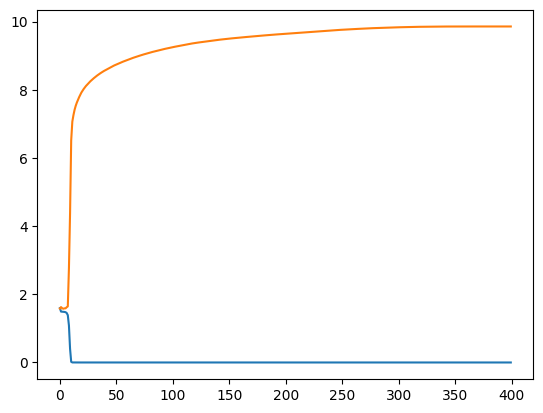

In [99]:
plt.plot(model_test_h.history['loss'])
plt.plot(model_test_h.history['val_loss'])

In [100]:
y_pred = model_test.predict(X)

4/4 [==============================] - 0s 6ms/step


In [101]:
y_pred

array([[[1.0000000e+00, 1.5940941e-21, 1.4163886e-22, 1.5040447e-10,
         1.1430493e-11],
        [0.0000000e+00, 1.0000000e+00, 1.0246478e-08, 1.4297806e-15,
         1.0370636e-28],
        [3.7008482e-10, 1.8736255e-17, 2.0413677e-21, 1.0000000e+00,
         5.6870562e-09],
        [3.9747491e-10, 4.5919278e-22, 3.7986542e-10, 1.3911362e-21,
         1.0000000e+00],
        [3.2468847e-08, 5.2576912e-09, 1.0000000e+00, 1.4600804e-13,
         2.1872143e-08]],

       [[1.8318069e-11, 3.1160199e-19, 3.6542525e-21, 8.8399893e-10,
         1.0000000e+00],
        [3.6673569e-33, 9.9999988e-01, 7.3403527e-08, 7.7217366e-10,
         2.2424078e-19],
        [9.3286869e-13, 2.9272423e-18, 1.0000000e+00, 6.4902648e-09,
         9.7681593e-17],
        [1.0000000e+00, 9.0082539e-11, 1.8191911e-16, 5.0649510e-16,
         1.1265237e-12],
        [1.2203945e-09, 7.5590763e-11, 1.2023789e-10, 1.0000000e+00,
         6.1905628e-20]],

       [[1.4796433e-09, 9.8236404e-19, 1.7001414e-24, 5.

In [102]:
np.argmax(y_pred, axis=-1)

array([[0, 1, 3, 4, 2],
       [4, 1, 2, 0, 3],
       [4, 0, 3, 1, 2],
       [3, 1, 4, 0, 2],
       [4, 2, 1, 3, 0],
       [4, 2, 0, 3, 1],
       [0, 2, 3, 1, 4],
       [3, 2, 1, 0, 4],
       [3, 2, 0, 4, 1],
       [0, 4, 3, 2, 1],
       [4, 2, 0, 3, 1],
       [0, 2, 3, 1, 4],
       [4, 3, 2, 0, 1],
       [0, 3, 1, 2, 4],
       [0, 1, 4, 2, 3],
       [4, 2, 1, 0, 3],
       [0, 2, 4, 1, 3],
       [2, 1, 0, 4, 3],
       [4, 3, 0, 1, 2],
       [3, 1, 4, 0, 2],
       [0, 3, 4, 2, 1],
       [0, 2, 4, 1, 3],
       [4, 1, 2, 3, 0],
       [0, 4, 1, 3, 2],
       [4, 2, 1, 3, 0],
       [3, 2, 4, 0, 1],
       [0, 2, 3, 1, 4],
       [4, 1, 0, 3, 2],
       [2, 3, 1, 0, 4],
       [2, 4, 3, 0, 1],
       [4, 2, 0, 1, 3],
       [4, 3, 2, 0, 1],
       [4, 2, 3, 1, 0],
       [4, 3, 2, 0, 1],
       [0, 3, 1, 4, 2],
       [4, 3, 1, 0, 2],
       [1, 2, 3, 4, 0],
       [0, 2, 1, 3, 4],
       [4, 2, 3, 0, 1],
       [1, 3, 2, 4, 0],
       [0, 1, 2, 4, 3],
       [2, 3, 1,

In [103]:
np.argmax(Y, axis=-1)

array([[0, 1, 3, 4, 2],
       [4, 1, 2, 0, 3],
       [4, 0, 3, 1, 2],
       [3, 1, 4, 0, 2],
       [4, 2, 1, 3, 0],
       [4, 2, 0, 3, 1],
       [0, 2, 3, 1, 4],
       [3, 2, 1, 0, 4],
       [3, 2, 0, 4, 1],
       [0, 4, 3, 2, 1],
       [4, 2, 0, 3, 1],
       [0, 2, 3, 1, 4],
       [4, 3, 2, 0, 1],
       [0, 3, 1, 2, 4],
       [0, 1, 4, 2, 3],
       [4, 2, 1, 0, 3],
       [0, 2, 4, 1, 3],
       [2, 1, 0, 4, 3],
       [4, 3, 0, 1, 2],
       [3, 1, 4, 0, 2],
       [0, 3, 4, 2, 1],
       [0, 2, 4, 1, 3],
       [4, 1, 2, 3, 0],
       [0, 4, 1, 3, 2],
       [4, 2, 1, 3, 0],
       [3, 2, 4, 0, 1],
       [0, 2, 3, 1, 4],
       [4, 1, 0, 3, 2],
       [2, 3, 1, 0, 4],
       [2, 4, 3, 0, 1],
       [4, 2, 0, 1, 3],
       [4, 3, 2, 0, 1],
       [4, 2, 3, 1, 0],
       [4, 3, 2, 0, 1],
       [0, 3, 1, 4, 2],
       [4, 3, 1, 0, 2],
       [1, 2, 3, 4, 0],
       [0, 2, 1, 3, 4],
       [4, 2, 3, 0, 1],
       [1, 3, 2, 4, 0],
       [0, 1, 2, 4, 3],
       [2, 3, 1,